This code is licensed to University of Quesland. You are not permitted to share or distribute this code**

In [ ]:
%%time
### GPU configuration
! nvidia-smi

Mon Jun  3 06:10:08 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P0              33W /  70W |    171MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
%%time
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
CPU times: user 17.7 ms, sys: 5.87 ms, total: 23.5 ms
Wall time: 2.9 s


In [ ]:
%%time
!pip install tensorflow_addons

CPU times: user 36.2 ms, sys: 7.06 ms, total: 43.2 ms
Wall time: 4.72 s


In [ ]:
%%time
!pip install visualkeras

CPU times: user 57 ms, sys: 7.44 ms, total: 64.4 ms
Wall time: 7.34 s


In [ ]:
%%time
import cv2
import numpy as np
import glob
import os

CPU times: user 12 µs, sys: 0 ns, total: 12 µs
Wall time: 14.8 µs


In [ ]:
%%time
import matplotlib.pyplot as plt
import seaborn as sns

import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import classification_report,confusion_matrix

import tensorflow as tf

CPU times: user 32 µs, sys: 2 µs, total: 34 µs
Wall time: 36 µs


In [ ]:
%%time
import os
import warnings
import itertools
import cv2
import seaborn as sns
import pandas as pd
import numpy  as np
from PIL import Image
from sklearn.utils import class_weight
from sklearn.metrics import confusion_matrix, classification_report
from collections import Counter

import tensorflow as tf
import tensorflow_addons as tfa
import visualkeras
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.metrics import multilabel_confusion_matrix

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import plot_model
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from sklearn.model_selection   import train_test_split
from keras.preprocessing.image import ImageDataGenerator

warnings.filterwarnings('ignore')
%matplotlib inline

CPU times: user 735 µs, sys: 0 ns, total: 735 µs
Wall time: 740 µs


In [ ]:
%%time
from matplotlib import pyplot as plt

CPU times: user 9 µs, sys: 0 ns, total: 9 µs
Wall time: 11.7 µs


In [ ]:
%%time
labels = ["Mosaic Disease", "Insect Infestation"]
img_size = 64
def get_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)

        # Loop through images in the current label's directory
        for img in os.listdir(path):
            try:
                # Read and convert the image to RGB format
                img_arr = cv2.imread(os.path.join(path, img))[..., ::-1]

                # Resize the image to the preferred size
                resized_arr = cv2.resize(img_arr, (img_size, img_size))

                # Append the resized image and its class number to the data list
                data.append([resized_arr, class_num])
            except Exception as e:
                print(f"Error reading or processing image {img} in {label} category: {e}")

    return data

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 8.34 µs


In [ ]:
%%time
data_dir = get_data("/content/drive/MyDrive/Luffa Dataset")

CPU times: user 58.9 s, sys: 1.93 s, total: 1min
Wall time: 2min 51s


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in
%%time
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
import time
import cv2
import glob
import matplotlib.pyplot as plt


CPU times: user 25 µs, sys: 0 ns, total: 25 µs
Wall time: 28.8 µs


In [ ]:
%%time
image_names = glob.glob(os.path.join('/content/drive/MyDrive/Luffa Dataset', '*', '*'))
print("Total number of training images: ", len(image_names))

# Make image_names a pandas Series object
image_names = pd.Series(image_names)


Total number of training images:  6226
CPU times: user 20.6 ms, sys: 4.85 ms, total: 25.5 ms
Wall time: 184 ms


In [ ]:
%%time
# train_df: a dataframe with 2 field: Filename, ClassId
data_df = pd.DataFrame()

# generate Filename field
data_df['Filename'] = image_names.map(lambda img_name: img_name.split("/")[-1])

# generate ClassId field
data_df['ClassId'] = image_names.map(lambda img_name: (img_name.split("/")[-2]))

data_df.head()

CPU times: user 14.6 ms, sys: 0 ns, total: 14.6 ms
Wall time: 25.2 ms


,Filename,ClassId
0,Insect Infestation (415).jpg,Insect Infestation
1,Insect Infestation (411).jpg,Insect Infestation
2,Insect Infestation (413).jpg,Insect Infestation
3,Insect Infestation (423).jpg,Insect Infestation
4,Insect Infestation (418).jpg,Insect Infestation


CPU times: user 213 ms, sys: 12 ms, total: 225 ms
Wall time: 278 ms


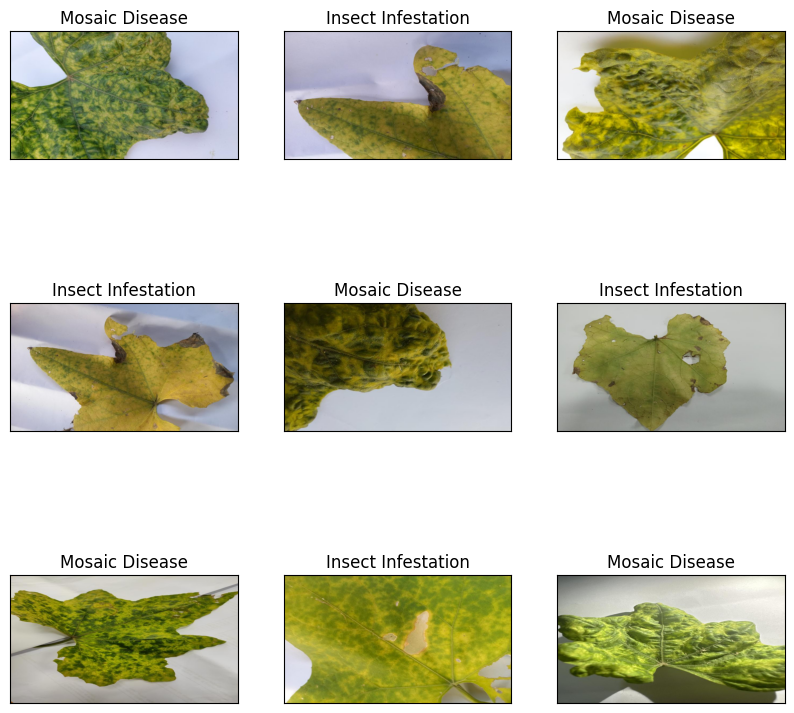

In [ ]:
%%time
plot_df = data_df.sample(min(9, len(data_df))).reset_index()

plt.figure(figsize=(10, 10))

for i in range(9):
    img_name = plot_df.loc[i, 'Filename']
    label_str = (plot_df.loc[i, 'ClassId'])
    plt.subplot(3,3,i+1)
    plt.imshow(plt.imread(os.path.join('/content/drive/MyDrive/Luffa Dataset',label_str, img_name)))
    plt.title(label_str)
    plt.xticks([])
    plt.yticks([])

In [ ]:
%%time
class_id_distribution = data_df['ClassId'].value_counts()
class_id_distribution.head(10)

CPU times: user 2.21 ms, sys: 10 µs, total: 2.22 ms
Wall time: 2.23 ms


ClassId
Mosaic Disease        3721
Insect Infestation    2505
Name: count, dtype: int64

CPU times: user 97 ms, sys: 1.96 ms, total: 99 ms
Wall time: 101 ms


<BarContainer object of 2 artists>

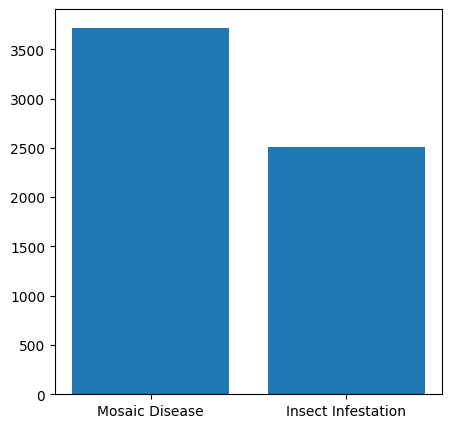

In [ ]:
%%time
plt.figure(figsize=(5,5))
plt.xticks(np.arange(43))
plt.bar(class_id_distribution.index, class_id_distribution.values)

CPU times: user 28.9 ms, sys: 1.09 ms, total: 30 ms
Wall time: 49.6 ms


Text(0.5, 1.0, 'Mosaic Disease')

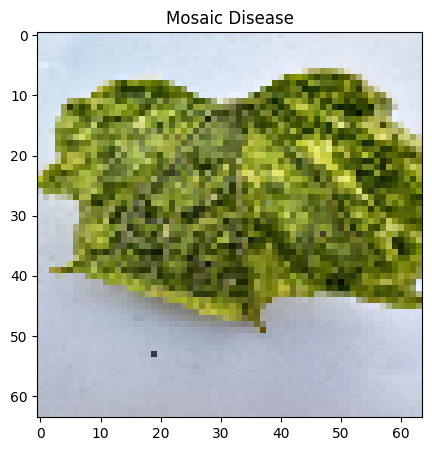

In [ ]:
%%time
plt.figure(figsize = (5,5))
plt.imshow(data_dir[1][0])
plt.title(labels[data_dir[0][1]])


In [ ]:
%%time
X = []
Y = []


for feature, label in data_dir:
  X.append(feature)
  Y.append(label)
X = np.array(X) / 255
X.reshape(-1, img_size, img_size, 1)
Y = np.array(Y)

CPU times: user 111 ms, sys: 130 ms, total: 241 ms
Wall time: 241 ms


In [ ]:
%%time
print(X.shape)

(6226, 64, 64, 3)
CPU times: user 1.07 ms, sys: 0 ns, total: 1.07 ms
Wall time: 1.98 ms


In [ ]:
%%time
# split with a stratified sampling
from sklearn.model_selection import train_test_split
(x_train, x_test, y_train, y_test) = train_test_split(X, Y, test_size=0.10, stratify=Y, random_state=42)

CPU times: user 73.5 ms, sys: 110 ms, total: 183 ms
Wall time: 183 ms


In [ ]:
%%time
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,
    test_size=0.18, random_state= 8) # 0.25 x 0.8 = 0.2

CPU times: user 62.2 ms, sys: 101 ms, total: 163 ms
Wall time: 163 ms


In [ ]:
%%time
print(f"x_train shape: {x_train.shape} - y_train shape: {y_train.shape}")
print(f"x_val shape: {x_val.shape} - y_val shape: {y_val.shape}")
print(f"x_test shape: {x_test.shape} - y_test shape: {y_test.shape}")


x_train shape: (4594, 64, 64, 3) - y_train shape: (4594,)
x_val shape: (1009, 64, 64, 3) - y_val shape: (1009,)
x_test shape: (623, 64, 64, 3) - y_test shape: (623,)
CPU times: user 2.4 ms, sys: 0 ns, total: 2.4 ms
Wall time: 2.76 ms


In [ ]:
%%time
!pip install -U tensorflow-addons

CPU times: user 53.3 ms, sys: 9.47 ms, total: 62.8 ms
Wall time: 5.74 s


In [ ]:
%%time
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

CPU times: user 15 µs, sys: 1 µs, total: 16 µs
Wall time: 18.1 µs


In [ ]:
%%time
num_classes = 2
input_shape = (64, 64, 3)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 4.53 µs


In [ ]:
%%time
learning_rate = 0.001
weight_decay = 0.0001
batch_size = 128
num_epochs = 250
image_size = 64  # We'll resize input images to this size
patch_size = 12  # Size of the patches to be extract from the input images
num_patches = (image_size // patch_size) ** 2
projection_dim = 64
num_heads = 3
transformer_units = [
    projection_dim * 2,
    projection_dim,
]  # Size of the transformer layers
transformer_layers = 1
mlp_head_units = [2048, 1024]

CPU times: user 6 µs, sys: 1 µs, total: 7 µs
Wall time: 9.78 µs


In [ ]:
%%time
data_augmentation = keras.Sequential(
    [
        layers.Normalization(),
        layers.Resizing(image_size, image_size),
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(factor=0.02),
        layers.RandomZoom(
            height_factor=0.2, width_factor=0.2
        ),
    ],
    name="data_augmentation",
)
# Compute the mean and the variance of the training data for normalization.
data_augmentation.layers[0].adapt(x_train)

CPU times: user 1.82 s, sys: 477 ms, total: 2.3 s
Wall time: 3.42 s


In [ ]:
%%time
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

CPU times: user 5 µs, sys: 1 µs, total: 6 µs
Wall time: 9.3 µs


In [ ]:
%%time
class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images=images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

CPU times: user 52 µs, sys: 0 ns, total: 52 µs
Wall time: 55.6 µs


Image size: 64 X 64
Patch size: 12 X 12
Patches per image: 25
Elements per patch: 432
CPU times: user 672 ms, sys: 11.9 ms, total: 683 ms
Wall time: 850 ms


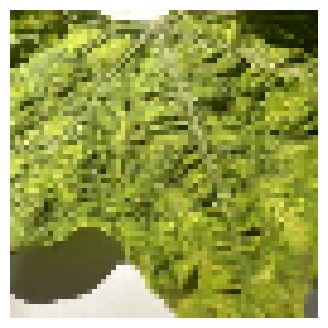

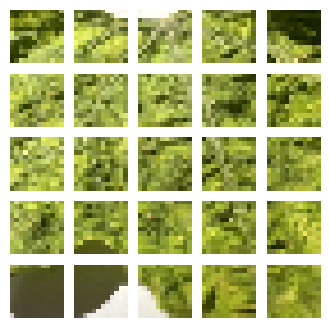

In [ ]:
%%time
import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
image = x_train[np.random.choice(range(x_train.shape[0]))]
plt.imshow(image.astype("float"))
plt.axis("off")

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(image_size, image_size)
)
patches = Patches(patch_size)(resized_image)
print(f"Image size: {image_size} X {image_size}")
print(f"Patch size: {patch_size} X {patch_size}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (patch_size, patch_size, 3))
    plt.imshow(patch_img.numpy().astype("float"))
    plt.axis("off")

In [ ]:
%%time
class PatchEncoder(layers.Layer):
    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(units=projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )

    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

CPU times: user 50 µs, sys: 2 µs, total: 52 µs
Wall time: 56.5 µs


In [ ]:
%%time
def create_vit_classifier():
    inputs = layers.Input(shape=input_shape)
    # Augment data.
    augmented = data_augmentation(inputs)
    # Create patches.
    patches = Patches(patch_size)(augmented)
    # Encode patches.
    encoded_patches = PatchEncoder(num_patches, projection_dim)(patches)

    # Create multiple layers of the Transformer block.
    for _ in range(transformer_layers):
        # Layer normalization 1.
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
        # Create a multi-head attention layer.
        attention_output = layers.MultiHeadAttention(
            num_heads=num_heads, key_dim=projection_dim, dropout=0.1
        )(x1, x1)
        # Skip connection 1.
        x2 = layers.Add()([attention_output, encoded_patches])
        # Layer normalization 2.
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)
        # MLP.
        x3 = mlp(x3, hidden_units=transformer_units, dropout_rate=0.1)
        # Skip connection 2.
        encoded_patches = layers.Add()([x3, x2])

    # Create a [batch_size, projection_dim] tensor.
    representation = layers.LayerNormalization(epsilon=1e-6)(encoded_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)
    # Add MLP.
    features = mlp(representation, hidden_units=mlp_head_units, dropout_rate=0.5)
    # Classify outputs.
    logits = layers.Dense(num_classes)(features)
    # Create the Keras model.
    model = keras.Model(inputs=inputs, outputs=logits)
    return model

CPU times: user 7 µs, sys: 0 ns, total: 7 µs
Wall time: 10.7 µs


In [ ]:
%%time
def run_experiment(model):
    optimizer = tfa.optimizers.AdamW(
        learning_rate=learning_rate, weight_decay=weight_decay
    )

    model.compile(
        optimizer=optimizer,
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        metrics=[
            tf.keras.metrics.SparseCategoricalAccuracy(name="accuracy"),
            tf.keras.metrics.SparseTopKCategoricalAccuracy(5, name="top-5-accuracy"),
        ],
    )
    model.summary()

    checkpoint_filepath = "/content/drive/MyDrive/model/model64_12.h5"
    checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
        checkpoint_filepath,
        monitor="val_accuracy",
        save_best_only=True,
        save_weights_only=True,

        lr_reducer = tf.keras.callbacks.ReduceLROnPlateau(factor=0.1,
                                                  cooldown= 10,
                                                  patience=10,
                                                  verbose =1,
                                                  min_lr=0.1e-7),


# stop learining as metric on validatopn stop increasing
        early_stopping = tf.keras.callbacks.EarlyStopping(patience=15,
                                                  verbose=1,
                                                  mode = 'auto')
    )

    history = model.fit(
        x=x_train,
        y=y_train,
        batch_size=batch_size,
        epochs=num_epochs,
        validation_data=(x_val, y_val),
        callbacks=[checkpoint_callback],
    )

    model.load_weights(checkpoint_filepath)
    _, accuracy, top_5_accuracy = model.evaluate(x_test, y_test)
    print(f"Test accuracy: {round(accuracy * 100, 2)}%")
    print(f"Test top 5 accuracy: {round(top_5_accuracy * 100, 2)}%")

    return history

CPU times: user 5 µs, sys: 0 ns, total: 5 µs
Wall time: 9.06 µs


In [ ]:
%%time
vit_classifier = create_vit_classifier()
vit_history = run_experiment(vit_classifier)

Cause: Unable to locate the source code of <bound method Patches.call of <__main__.Patches object at 0x7cc1204d6440>>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <bound method Patches.call of <__main__.Patches object at 0x7cc1204d6440>>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <bound method PatchEncoder.call of <__main__.PatchEncoder object at 0x7cc1204d4a30>>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: Unable to locate the source code of <bound method PatchEncoder.call of <__main__.PatchEncoder object at 0x7cc1204d4a30>>. Note that functions defined in certain environments, like the interactive Python shell, do not expose their source code. If that is the case, you should define them in a .py source file. If you are certain the code is graph-compatible, wrap the call using @tf.autograph.experimental.do_not_convert. Original error: could not get source code
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 64, 64, 3)]          0         []                            
                                                                                                  
 data_augmentation (Seq

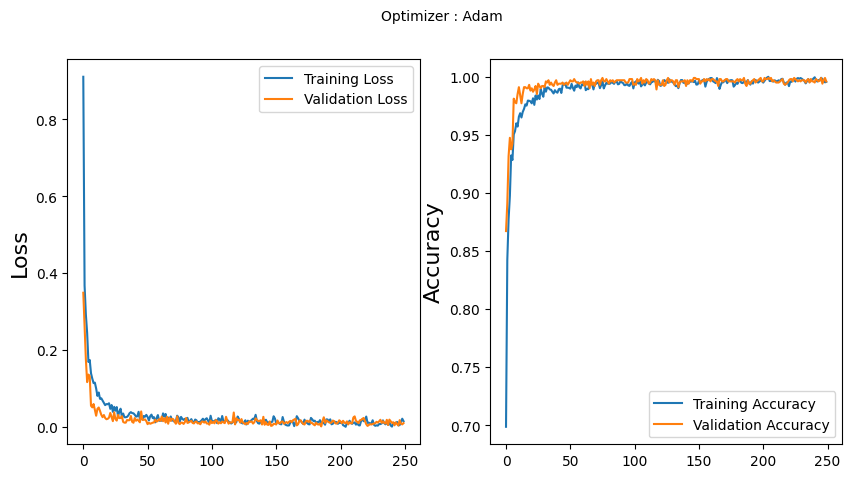

CPU times: user 351 ms, sys: 129 ms, total: 480 ms
Wall time: 343 ms


In [ ]:
%%time
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(vit_history.history['loss'], label='Training Loss')
plt.plot(vit_history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(vit_history.history['accuracy'], label='Training Accuracy')
plt.plot(vit_history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
%%time
vit_predictions = vit_classifier.predict(x_val)
vit_y_pred = [np.argmax(probas) for probas in vit_predictions]

32/32 [==============================] - 0s 4ms/step
CPU times: user 587 ms, sys: 97.1 ms, total: 684 ms
Wall time: 647 ms


In [ ]:
%%time
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f%' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

CPU times: user 9 µs, sys: 0 ns, total: 9 µs
Wall time: 12.2 µs


Confusion matrix, without normalization
[[586   0]
 [  1 422]]


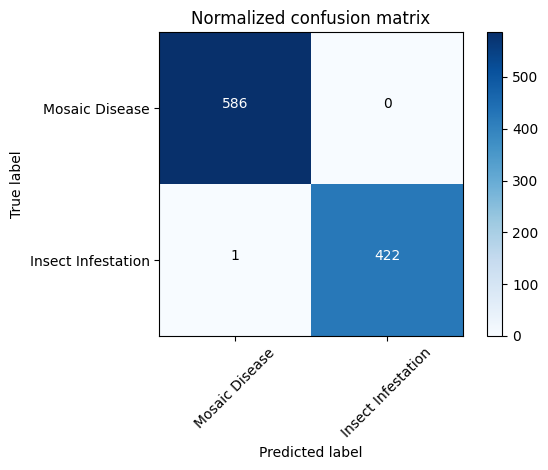

CPU times: user 248 ms, sys: 147 ms, total: 395 ms
Wall time: 254 ms


In [ ]:
# compute confusion matrix
%%time
cnf_matrix = confusion_matrix(y_val, vit_y_pred)
np.set_printoptions(precision=2)
# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["Mosaic Disease", "Insect Infestation"], title='Normalized confusion matrix')
plt.show()

In [ ]:
%%time
print(classification_report(y_val, vit_y_pred, target_names=["Mosaic Disease", "Insect Infestation"]))



                    precision    recall  f1-score   support

    Mosaic Disease       1.00      1.00      1.00       586
Insect Infestation       1.00      1.00      1.00       423

          accuracy                           1.00      1009
         macro avg       1.00      1.00      1.00      1009
      weighted avg       1.00      1.00      1.00      1009

CPU times: user 8.02 ms, sys: 1.07 ms, total: 9.09 ms
Wall time: 11.2 ms


In [ ]:
%%time
vit_predictions = vit_classifier.predict(x_test)
vit_y_pred = [np.argmax(probas) for probas in vit_predictions]

20/20 [==============================] - 0s 4ms/step
CPU times: user 212 ms, sys: 39.4 ms, total: 251 ms
Wall time: 264 ms


In [ ]:
%%time
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f%' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

CPU times: user 6 µs, sys: 0 ns, total: 6 µs
Wall time: 9.3 µs


Confusion matrix, without normalization
[[372   0]
 [  2 249]]


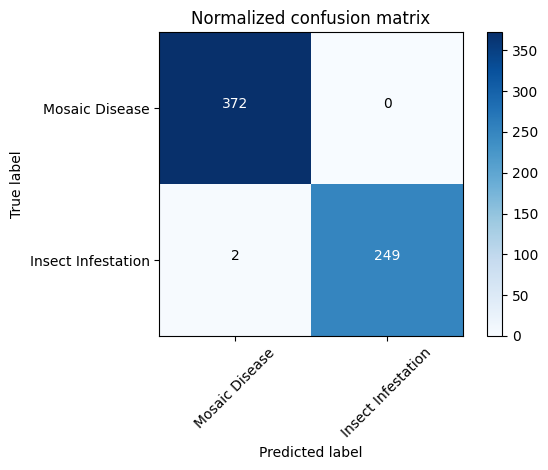

CPU times: user 264 ms, sys: 139 ms, total: 403 ms
Wall time: 248 ms


In [ ]:
# compute confusion matrix
%%time
cnf_matrix = confusion_matrix(y_test, vit_y_pred)
np.set_printoptions(precision=2)
# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["Mosaic Disease", "Insect Infestation"], title='Normalized confusion matrix')
plt.show()

In [ ]:
%%time
print(classification_report(y_test, vit_y_pred, target_names=["Mosaic Disease", "Insect Infestation"]))



                    precision    recall  f1-score   support

    Mosaic Disease       0.99      1.00      1.00       372
Insect Infestation       1.00      0.99      1.00       251

          accuracy                           1.00       623
         macro avg       1.00      1.00      1.00       623
      weighted avg       1.00      1.00      1.00       623

CPU times: user 9.11 ms, sys: 0 ns, total: 9.11 ms
Wall time: 9.3 ms
